## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [70]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
import random
from matplotlib import pyplot as plt
import os

random.seed(37)
torch.manual_seed(37)
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [71]:
# device = torch.device('mps') # uncomment for mac m1

In [72]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [73]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [74]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [75]:
len(fmnist_dataset_test)

10000

In [76]:
for img, label in train_loader:
    print(img.shape)
    # print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [77]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, input_shape),
            nn.BatchNorm1d(input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, input_shape),
            nn.BatchNorm1d(input_shape),
            nn.Linear(input_shape, num_classes),
            nn.Dropout(),
            nn.Linear(num_classes, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [78]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─BatchNorm1d: 2-3                  [-1, 784]                 1,568
|    └─ReLU: 2-4                         [-1, 784]                 --
|    └─Linear: 2-5                       [-1, 784]                 615,440
|    └─BatchNorm1d: 2-6                  [-1, 784]                 1,568
|    └─Linear: 2-7                       [-1, 10]                  7,850
|    └─Dropout: 2-8                      [-1, 10]                  --
|    └─Linear: 2-9                       [-1, 10]                  110
Total params: 1,241,976
Trainable params: 1,241,976
Non-trainable params: 0
Total mult-adds (M): 2.48
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 4.74
Estimated Total Size

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─BatchNorm1d: 2-3                  [-1, 784]                 1,568
|    └─ReLU: 2-4                         [-1, 784]                 --
|    └─Linear: 2-5                       [-1, 784]                 615,440
|    └─BatchNorm1d: 2-6                  [-1, 784]                 1,568
|    └─Linear: 2-7                       [-1, 10]                  7,850
|    └─Dropout: 2-8                      [-1, 10]                  --
|    └─Linear: 2-9                       [-1, 10]                  110
Total params: 1,241,976
Trainable params: 1,241,976
Non-trainable params: 0
Total mult-adds (M): 2.48
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 4.74
Estimated Total Size

Your experiments come here:

In [89]:
def gimme_loss_and_correct(model, loss_func, X, y):
    outputs = model(X)
    loss = loss_func(outputs, y)
    values, idx = torch.max(outputs, 1)
    correct = (idx == y).sum().item()
    return loss.item(), correct

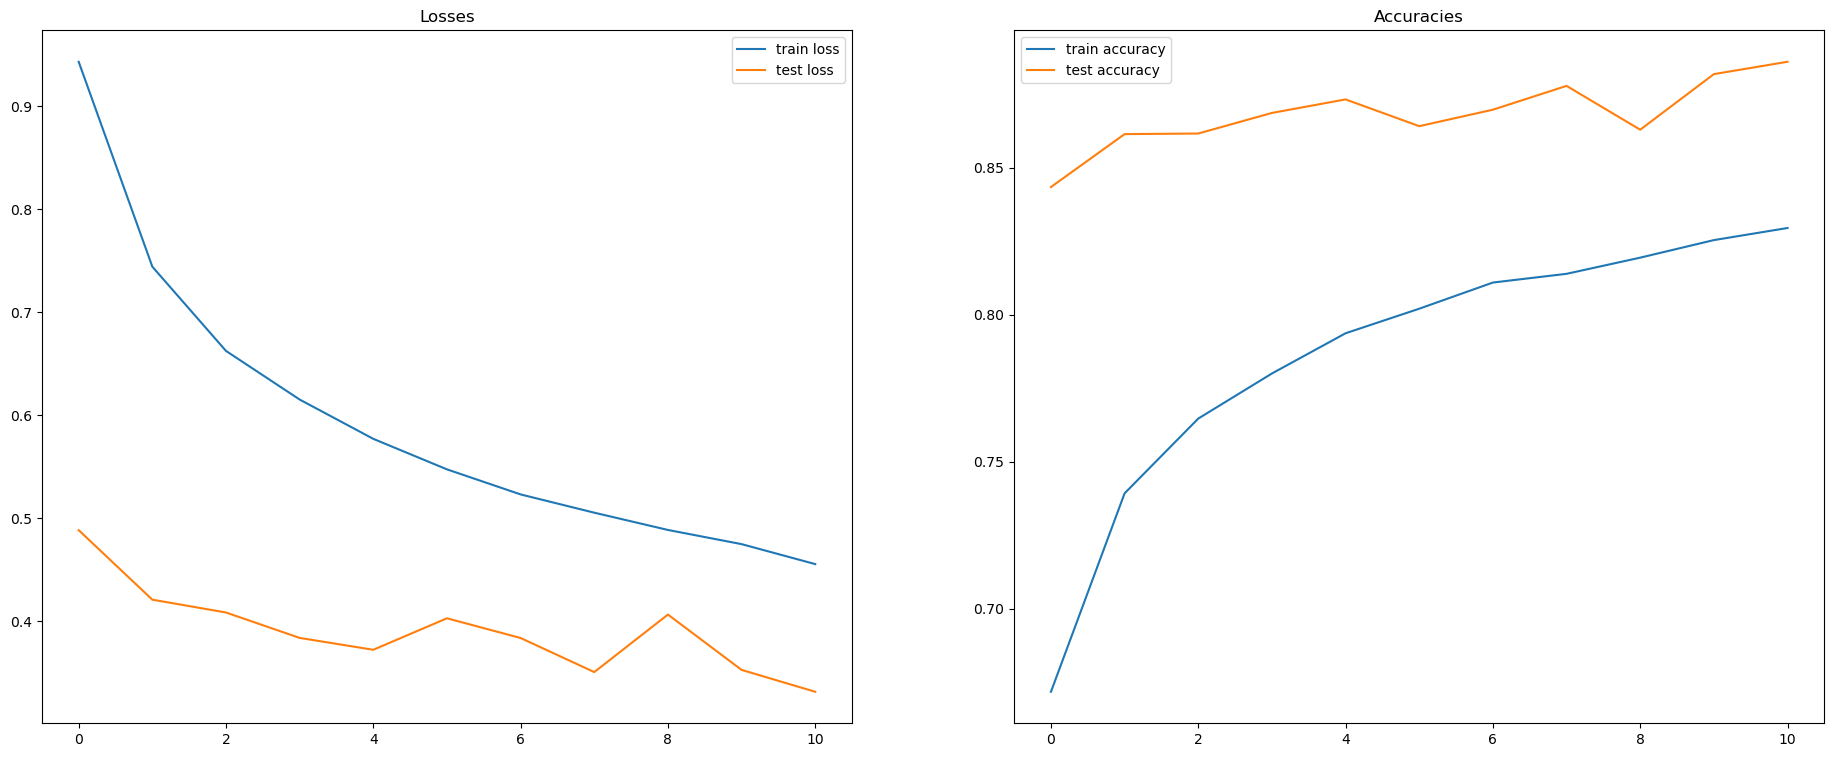

In [90]:
model = TinyNeuralNetwork().to(device)
# YOUR CODE HERE
opt = torch.optim.Adam(model.parameters(), lr=1e-4)
# YOUR CODE HERE
loss_func = nn.CrossEntropyLoss()
# Your experiments, training and validation loops here

test_accuracy = 0.0
test_losses = []
train_losses = []
test_accuracies = []
train_accuracies = []

while test_accuracy < 0.885:
    model.train()
    train_loss = 0.0
    train_correct = 0

    for X_train, y_train in train_loader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        opt.zero_grad()
        outputs = model(X_train)
        loss = loss_func(outputs, y_train)
        loss.backward()
        opt.step()
        train_loss += loss.item()
        values, idx = torch.max(outputs, 1)
        train_correct += (idx == y_train).sum().item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = train_correct / len(fmnist_dataset_train)
    train_accuracies.append(train_accuracy)

    model.eval()
    correct = 0
    tt = 0
    test_loss = 0.0
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        l, c = gimme_loss_and_correct(model=model, loss_func=loss_func, X=X_test, y=y_test)
        test_loss += l
        correct += c
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    test_accuracy = correct / len(fmnist_dataset_test)
    test_accuracies.append(test_accuracy)

fig, (p1, p2) = plt.subplots(1, 2, figsize=(23, 9))

p1.set_title('Losses')
p1.plot(train_losses, label='train loss')
p1.plot(test_losses, label='test loss')
p1.legend()

p2.set_title('Accuracies')
p2.plot(train_accuracies, label='train accuracy')
p2.plot(test_accuracies, label='test accuracy')
p2.legend()


### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [80]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, num_classes)
        )
        
    def forward(self, inp):
        out = self.model(inp)
        return out

In [81]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─Linear: 2-4                       [-1, 784]                 615,440
|    └─ReLU: 2-5                         [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 784]                 615,440
|    └─ReLU: 2-7                         [-1, 784]                 --
|    └─Linear: 2-8                       [-1, 10]                  7,850
Total params: 1,854,170
Trainable params: 1,854,170
Non-trainable params: 0
Total mult-adds (M): 3.70
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 7.07
Estimated Total Size (MB): 7.09


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─ReLU: 2-3                         [-1, 784]                 --
|    └─Linear: 2-4                       [-1, 784]                 615,440
|    └─ReLU: 2-5                         [-1, 784]                 --
|    └─Linear: 2-6                       [-1, 784]                 615,440
|    └─ReLU: 2-7                         [-1, 784]                 --
|    └─Linear: 2-8                       [-1, 10]                  7,850
Total params: 1,854,170
Trainable params: 1,854,170
Non-trainable params: 0
Total mult-adds (M): 3.70
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 7.07
Estimated Total Size (MB): 7.09

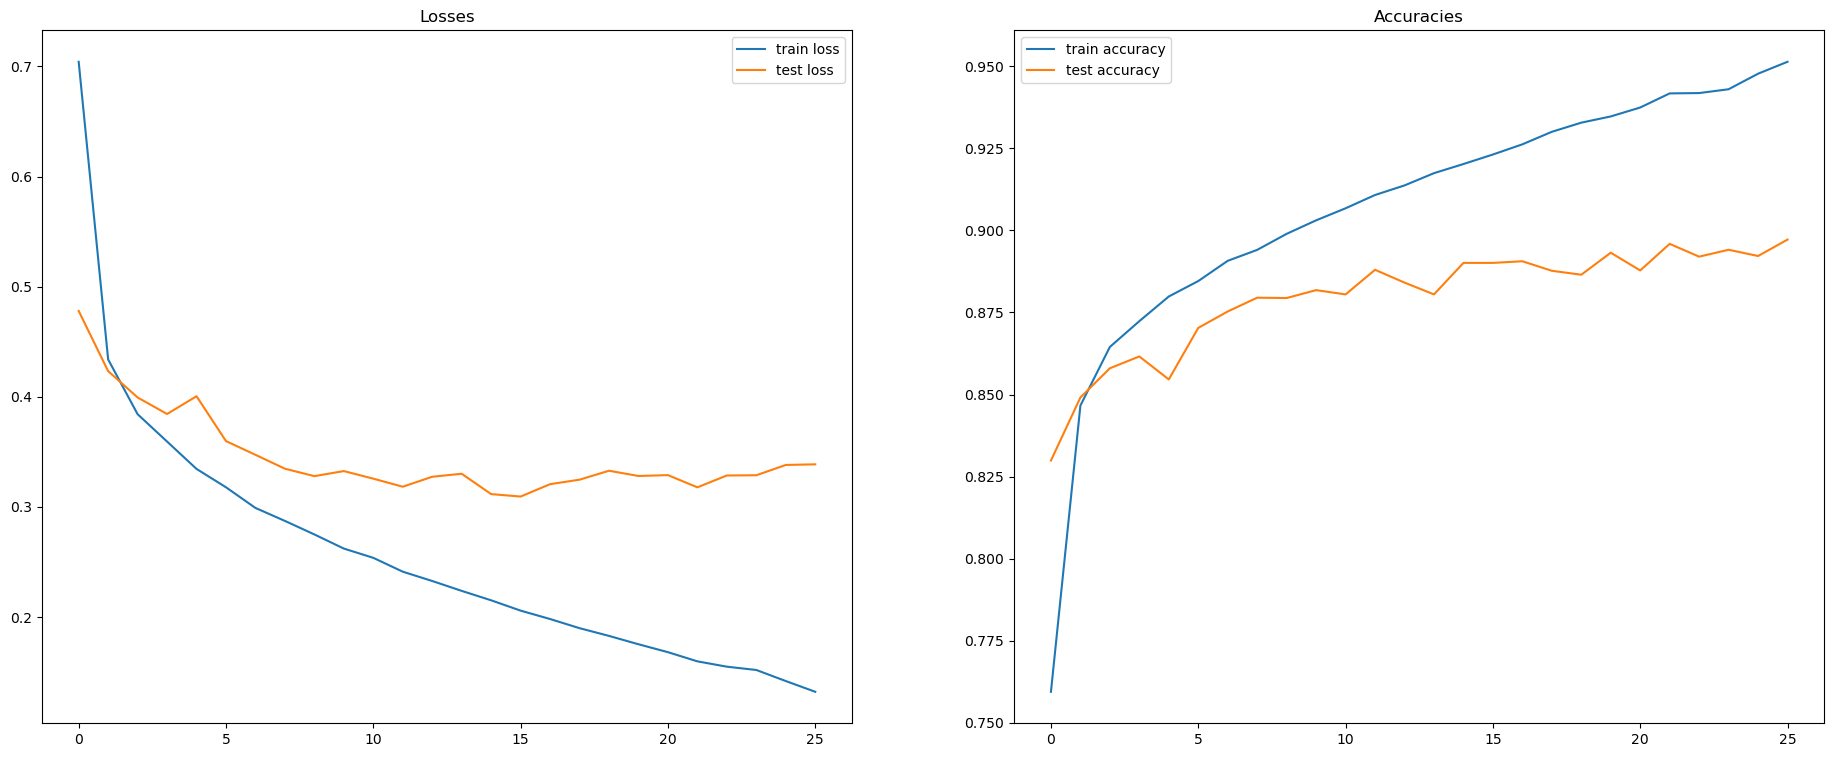

In [91]:
model = OverfittingNeuralNetwork().to(device)
# YOUR CODE HERE
opt = torch.optim.Adam(model.parameters(), lr=1e-4)
# YOUR CODE HERE
loss_func = nn.CrossEntropyLoss()
# Your experiments, training and validation loops here

test_accuracy = 0.0
train_accuracy = 0.0
train_losses = []
test_losses = []
test_accuracies = []
train_accuracies = []

while train_accuracy < 0.95:
    model.train()
    train_loss = 0.0
    train_correct = 0

    for X_train, y_train in train_loader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        opt.zero_grad()
        outputs = model(X_train)
        loss = loss_func(outputs, y_train)
        loss.backward()
        opt.step()
        train_loss += loss.item()
        values, idx = torch.max(outputs, 1)
        train_correct += (idx == y_train).sum().item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = train_correct / len(fmnist_dataset_train)
    train_accuracies.append(train_accuracy)

    model.eval()
    correct = 0
    tt = 0
    test_loss = 0.0
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        l, c = gimme_loss_and_correct(model=model, loss_func=loss_func, X=X_test, y=y_test)
        test_loss += l
        correct += c
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    test_accuracy = correct / len(fmnist_dataset_test)
    test_accuracies.append(test_accuracy)

fig, (p1, p2) = plt.subplots(1, 2, figsize=(23, 9))

p1.set_title('Losses')
p1.plot(train_losses, label='train loss')
p1.plot(test_losses, label='test loss')
p1.legend()

p2.set_title('Accuracies')
p2.plot(train_accuracies, label='train accuracy')
p2.plot(test_accuracies, label='test accuracy')
p2.legend()

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [83]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(), # This layer converts image into a vector to use Linear layers afterwards
            # Your network structure comes here
            nn.Linear(input_shape, input_shape),
            nn.BatchNorm1d(input_shape),
            nn.ReLU(),
            nn.Linear(input_shape, input_shape // 2),
            nn.BatchNorm1d(input_shape // 2),
            nn.Linear(input_shape // 2, num_classes),
            nn.Dropout(0.4),
            nn.Linear(num_classes, num_classes)
        )
        
    def forward(self, inp):       
        out = self.model(inp)
        return out

In [84]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─BatchNorm1d: 2-3                  [-1, 784]                 1,568
|    └─ReLU: 2-4                         [-1, 784]                 --
|    └─Linear: 2-5                       [-1, 392]                 307,720
|    └─BatchNorm1d: 2-6                  [-1, 392]                 784
|    └─Linear: 2-7                       [-1, 10]                  3,930
|    └─Dropout: 2-8                      [-1, 10]                  --
|    └─Linear: 2-9                       [-1, 10]                  110
Total params: 929,552
Trainable params: 929,552
Non-trainable params: 0
Total mult-adds (M): 1.85
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.55
Estimated Total Size (MB):

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Flatten: 2-1                      [-1, 784]                 --
|    └─Linear: 2-2                       [-1, 784]                 615,440
|    └─BatchNorm1d: 2-3                  [-1, 784]                 1,568
|    └─ReLU: 2-4                         [-1, 784]                 --
|    └─Linear: 2-5                       [-1, 392]                 307,720
|    └─BatchNorm1d: 2-6                  [-1, 392]                 784
|    └─Linear: 2-7                       [-1, 10]                  3,930
|    └─Dropout: 2-8                      [-1, 10]                  --
|    └─Linear: 2-9                       [-1, 10]                  110
Total params: 929,552
Trainable params: 929,552
Non-trainable params: 0
Total mult-adds (M): 1.85
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.55
Estimated Total Size (MB):

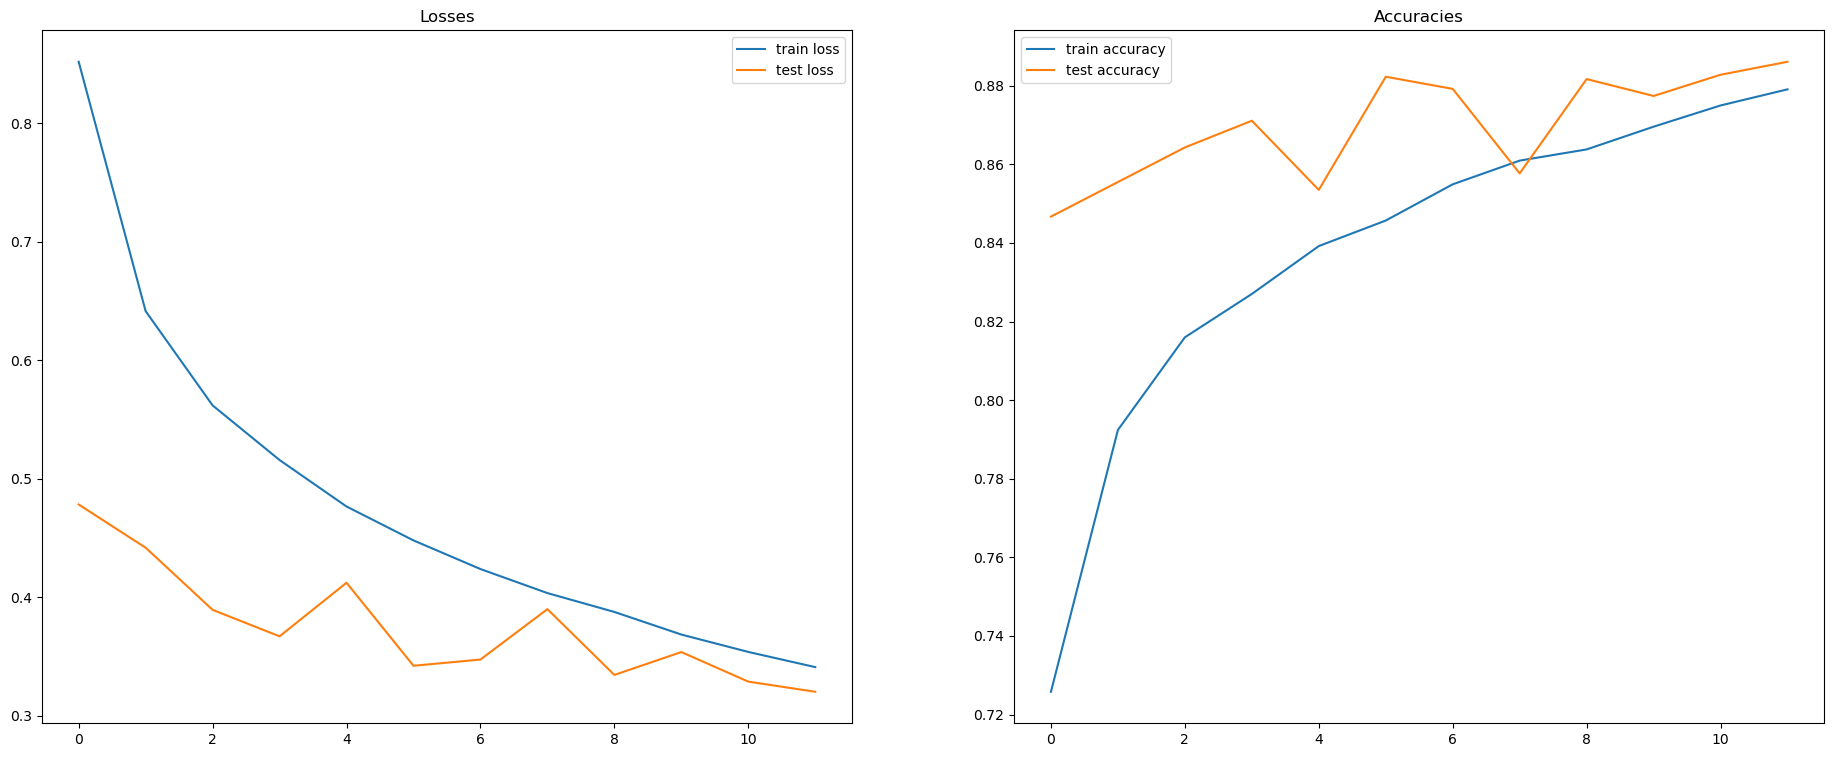

In [93]:
model = FixedNeuralNetwork().to(device)
# YOUR CODE HERE
opt = torch.optim.Adam(model.parameters(), lr=1e-4)
# YOUR CODE HERE
loss_func = nn.CrossEntropyLoss()
# Your experiments, training and validation loops here

test_accuracy = 0.0
train_accuracy = 0.0
train_losses = []
test_losses = []
test_accuracies = []
train_accuracies = []

while test_accuracy < 0.885:
    model.train()
    train_loss = 0.0
    train_correct = 0

    for X_train, y_train in train_loader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        opt.zero_grad()
        outputs = model(X_train)
        loss = loss_func(outputs, y_train)
        loss.backward()
        opt.step()
        train_loss += loss.item()
        values, idx = torch.max(outputs, 1)
        train_correct += (idx == y_train).sum().item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = train_correct / len(fmnist_dataset_train)
    train_accuracies.append(train_accuracy)

    model.eval()
    correct = 0
    tt = 0
    test_loss = 0.0
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        l, c = gimme_loss_and_correct(model=model, loss_func=loss_func, X=X_test, y=y_test)
        test_loss += l
        correct += c
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    test_accuracy = correct / len(fmnist_dataset_test)
    test_accuracies.append(test_accuracy)

fig, (p1, p2) = plt.subplots(1, 2, figsize=(23, 9))

p1.set_title('Losses')
p1.plot(train_losses, label='train loss')
p1.plot(test_losses, label='test loss')
p1.legend()

p2.set_title('Accuracies')
p2.plot(train_accuracies, label='train accuracy')
p2.plot(test_accuracies, label='test accuracy')
p2.legend()

### Conclusions:
_Write down small report with your conclusions and your ideas._

Очевидно модель без регулязирации переобучается, так как ничто не мешает ей использовать большие веса, которые  очень точно подгоняют нейросеть под тренировочные данные, по-сути запоминая их. Так же для переобучения я добавил ReLU, так как она обеспечивает эффективное распространение градиентов и обновление весов во время тренинга, что приводит к более быстрому обучению.

Для того, чтобы не дать модели переобучаться я добавил Dropout и Batch Norm
В процессе обучения модель старается подогнать веса под трейнинг данные. Dropout не дает модели максимально подогнать веса так как случайным образом отбрасывает некоторую часть инпута слоя на каждом этапе обучения. Из-за этого модели приходится подбирать веса под более общие закономерности.
Batch Norm для каждого прогона нормализует данные внутри модели с их средним значением и стандартным отклонением. Это способствует оптимизации, модели с применением Batch Norm обычно быстрее обучаются. К тому же, он добавляет 2 тренируемых параметра - стандартное отклонение (гамма) и среднее (бета).